# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/investor-relations). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

Instructions

This section divides the instructions for this Challenge into four steps and an optional fifth step, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

* Step 5 (optional): Forecast revenue by using time series models

The following subsections detail these steps.

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Use hvPlot to visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

2. Using hvPlot, visualize this traffic as a heatmap, referencing the `index.hour` as the x-axis and the `index.dayofweek` as the y-axis. Does any day-of-week effect that you observe concentrate in just a few hours of that day?

3. Group the search data by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then use hvPlot to plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?

## Step 5 (Optional): Forecast Revenue by Using Time Series Models

A few weeks after your initial analysis, the finance group follows up to find out if you can help them solve a different problem. Your fame as a growth analyst in the company continues to grow!

Specifically, the finance group wants a forecast of the total sales for the next quarter. This will dramatically increase their ability to plan budgets and to help guide expectations for the company investors.

To do so, complete the following steps:

1. Read in the daily historical sales (that is, revenue) figures, and then apply a Prophet model to the data.

2. Interpret the model output to identify any seasonal patterns in the company's revenue. For example, what are the peak revenue days? (Mondays? Fridays? Something else?)

3. Produce a sales forecast for the finance group. Give them a number for the expected total sales in the next quarter. Include the best- and worst-case scenarios to help them make better plans.


## Install and import the required libraries and dependencies

In [4]:
# Install the required libraries
!pip install pystan
!pip install prophet
!pip install hvplot
!pip install holoviews

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 74.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 KB 5.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-w

In [5]:
# Import the required libraries and dependencies
import pandas as pd
import holoviews as hv
from prophet import Prophet
import hvplot.pandas
import datetime as dt
%matplotlib inline

Output hidden; open in https://colab.research.google.com to view.

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Use hvPlot to visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Use hvPlot to visualize the results. Do any unusual patterns exist?

In [6]:
# Upload the "google_hourly_search_trends.csv" file into Colab, then store in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

from google.colab import files
uploaded = files.upload()

df_mercado_trends = pd.read_csv("google_hourly_search_trends.csv")
df_mercado_trends['Date'] = pd.to_datetime(df_mercado_trends['Date'])
df_mercado_trends.set_index('Date', inplace=True)

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

Saving google_hourly_search_trends.csv to google_hourly_search_trends.csv


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [7]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


In [8]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Slice the DataFrame to just the month of May 2020
df_may_2020 = df_mercado_trends['2020-05']

# Use hvPlot to visualize the data for May 2020
df_may_2020.hvplot()


Output hidden; open in https://colab.research.google.com to view.

#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [9]:
# Calculate the sum of the total search traffic for May 2020
traffic_may_2020 = df_may_2020['2020-05'].sum()

# View the traffic_may_2020 value
print(traffic_may_2020)


Search Trends    38181
dtype: int64


<ipython-input-9-e26f4b58ad0f>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  traffic_may_2020 = df_may_2020['2020-05'].sum()


In [10]:
# Calcluate the monthly median search traffic across all months 
# Group the DataFrame by index year and then index month, chain the sum and then the median functions
median_monthly_traffic = df_mercado_trends.groupby([df_mercado_trends.index.year, df_mercado_trends.index.month])['Search Trends'].sum().median()

# View the median_monthly_traffic value
print(median_monthly_traffic)


35172.5


In [11]:
# Compare the search traffic for the month of May 2020 to the overall monthly median value
traffic_may_2020/median_monthly_traffic

Search Trends    1.085536
dtype: float64

##### Answer the following question: 

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:** Yes, the financial results had something to do with the increased traffic.  There are spikes in traffic around May 5th and 6th when the MercadoLibres quarterly results were released.

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

2. Using hvPlot, visualize this traffic as a heatmap, referencing the `index.hour` as the x-axis and the `index.dayofweek` as the y-axis. Does any day-of-week effect that you observe concentrate in just a few hours of that day?

3. Group the search data by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

In [ ]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Group the hourly search data to plot (use hvPlot) the average traffic by the day of week 
df_mercado_trends.groupby(df_mercado_trends.index.dayofweek)['Search Trends'].mean().hvplot.bar(title='Average Hourly Search Traffic by Day of Week')


Output hidden; open in https://colab.research.google.com to view.

#### Step 2: Using hvPlot, visualize this traffic as a heatmap, referencing the `index.hour` as the x-axis and the `index.dayofweek` as the y-axis. Does any day-of-week effect that you observe concentrate in just a few hours of that day?

In [ ]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Use hvPlot to visualize the hour of the day and day of week search traffic as a heatmap.
# Resample the data to hourly intervals and unstack the day of week and hour of day into columns
df_hourly = df_mercado_trends.groupby([df_mercado_trends.index.dayofweek, df_mercado_trends.index.hour])['Search Trends'].mean().unstack(level=0)

df_hourly.hvplot.heatmap(xlabel='Day of Week', ylabel='Hour of Day', cmap='inferno', title='Hour of Day and Day of Week Search Traffic Heatmap')

Output hidden; open in https://colab.research.google.com to view.

##### Answer the following question:

**Question:** Does any day-of-week effect that you observe concentrate in just a few hours of that day?

**Answer:** The most traffic for the site happens on Mondays and decreases going into the rest of the week.

#### Step 3: Group the search data by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?

In [ ]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Group the hourly search data to plot (use hvPlot) the average traffic by the week of the year
df_mercado_trends.groupby(df_mercado_trends.index.isocalendar().week)['Search Trends'].mean().hvplot.heatmap(title='Hourly Search Traffic by Week of Year')

Output hidden; open in https://colab.research.google.com to view.

##### Answer the following question:

**Question:** Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?

**Answer:** According to the above plot, traffic increases near the end of the year starting in mid October.

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then use hvPlot to plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [ ]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
from google.colab import files
uploaded = files.upload()

df_mercado_stock = pd.read_csv('mercado_stock_price.csv', index_col='date', parse_dates=True)


# View the first and last five rows of the DataFrame
print(df_mercado_stock.head())
print(df_mercado_stock.tail())


Saving mercado_stock_price.csv to mercado_stock_price (7).csv
                      close
date                       
2015-01-02 09:00:00  127.67
2015-01-02 10:00:00  125.44
2015-01-02 11:00:00  125.57
2015-01-02 12:00:00  125.40
2015-01-02 13:00:00  125.17
                        close
date                         
2020-07-31 11:00:00  1105.780
2020-07-31 12:00:00  1087.925
2020-07-31 13:00:00  1095.800
2020-07-31 14:00:00  1110.650
2020-07-31 15:00:00  1122.510


In [ ]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Use hvPlot to visualize the closing price of the df_mercado_stock DataFrame
df_mercado_stock['close'].hvplot.line(title='Closing Price of MercadoLibre Stock')


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data
mercado_stock_trends_df = pd.concat([df_mercado_stock, df_mercado_trends], axis=1, join="inner")

# View the first and last five rows of the DataFrame
print(mercado_stock_trends_df.head())
print(mercado_stock_trends_df.tail())


                     close  Search Trends
2016-06-01 00:00:00    NaN             97
2016-06-01 01:00:00    NaN             92
2016-06-01 02:00:00    NaN             76
2016-06-01 03:00:00    NaN             60
2016-06-01 04:00:00    NaN             38
                        close  Search Trends
2020-07-31 11:00:00  1105.780             20
2020-07-31 12:00:00  1087.925             32
2020-07-31 13:00:00  1095.800             41
2020-07-31 14:00:00  1110.650             47
2020-07-31 15:00:00  1122.510             53


#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then use hvPlot to plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

In [ ]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06) 
first_half_2020 = mercado_stock_trends_df.loc['2020-01':'2020-06']

# View the first and last five rows of first_half_2020 DataFrame
print(first_half_2020.head())
print(first_half_2020.tail())


                     close  Search Trends
2020-01-01 00:00:00    NaN             37
2020-01-01 01:00:00    NaN             39
2020-01-01 02:00:00    NaN              0
2020-01-01 03:00:00    NaN              0
2020-01-01 04:00:00    NaN              0
                     close  Search Trends
2020-06-30 19:00:00    NaN             59
2020-06-30 20:00:00    NaN             62
2020-06-30 21:00:00    NaN             71
2020-06-30 22:00:00    NaN             85
2020-06-30 23:00:00    NaN             93


In [ ]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Use hvPlot to visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `hvplot(shared_axes=False, subplots=True).cols(1)`
mercado_stock_trends_df.hvplot(y=["close", "Search Trends"], shared_axes=False, subplots=True).cols(1)


Output hidden; open in https://colab.research.google.com to view.

##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:** There is not a specific trend between both time series.  Zooming in to both graphs around May 2020 shows a spike which coincides with the quarterly reports being made public around the 5th or 6th of the month.

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [ ]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour
mercado_stock_trends_df['Lagged Search Trends'] = mercado_stock_trends_df['Search Trends'].shift(1)


In [ ]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
mercado_stock_trends_df['Stock Volatility'] = mercado_stock_trends_df['close'].pct_change().rolling(window=4).std()


In [ ]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Use hvPlot to visualize the stock volatility
mercado_stock_trends_df.hvplot(y="Stock Volatility")


Output hidden; open in https://colab.research.google.com to view.

**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [ ]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price
mercado_stock_trends_df['Hourly Stock Return'] = mercado_stock_trends_df['close'].pct_change()


In [ ]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame
print(mercado_stock_trends_df.head())
print(mercado_stock_trends_df.tail())


                     close  Search Trends  Lagged Search Trends  \
2016-06-01 00:00:00    NaN             97                   NaN   
2016-06-01 01:00:00    NaN             92                  97.0   
2016-06-01 02:00:00    NaN             76                  92.0   
2016-06-01 03:00:00    NaN             60                  76.0   
2016-06-01 04:00:00    NaN             38                  60.0   

                     Stock Volatility  Hourly Stock Return  
2016-06-01 00:00:00               NaN                  NaN  
2016-06-01 01:00:00               NaN                  NaN  
2016-06-01 02:00:00               NaN                  NaN  
2016-06-01 03:00:00               NaN                  NaN  
2016-06-01 04:00:00               NaN                  NaN  
                        close  Search Trends  Lagged Search Trends  \
2020-07-31 11:00:00  1105.780             20                  11.0   
2020-07-31 12:00:00  1087.925             32                  20.0   
2020-07-31 13:00:00  

#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [ ]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
correlation_df = mercado_stock_trends_df[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].corr()

# View the correlation table
print(correlation_df)

                      Stock Volatility  Lagged Search Trends  \
Stock Volatility              1.000000             -0.260012   
Lagged Search Trends         -0.260012              1.000000   
Hourly Stock Return           0.052663             -0.017943   

                      Hourly Stock Return  
Stock Volatility                 0.052663  
Lagged Search Trends            -0.017943  
Hourly Stock Return              1.000000  


##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:** There is a negativie correlation between searches for the firm and its stock volatility and also a positive correlation between search activity in one hour and stock returns in the next.  When stock activity goes up, so does their stock price.

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [ ]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
mercado_prophet_df = df_mercado_trends.reset_index()

# Label the columns ds and y so that the syntax is recognized by Prophet
mercado_prophet_df = mercado_prophet_df.rename(columns={'Date': 'ds', 'Search Trends': 'y'})

# Drop an NaN values from the prophet_df DataFrame
mercado_prophet_df = mercado_prophet_df.dropna()

# View the first and last five rows of the mercado_prophet_df DataFrame
print(mercado_prophet_df.head())
print(mercado_prophet_df.tail())


                   ds   y
0 2016-06-01 00:00:00  97
1 2016-06-01 01:00:00  92
2 2016-06-01 02:00:00  76
3 2016-06-01 03:00:00  60
4 2016-06-01 04:00:00  38
                       ds   y
37101 2020-09-07 20:00:00  71
37102 2020-09-07 21:00:00  83
37103 2020-09-07 22:00:00  96
37104 2020-09-07 23:00:00  97
37105 2020-09-08 00:00:00  96


In [ ]:
# Call the Prophet function, store as an object
model_mercado_trends = Prophet()


In [ ]:
# Fit the time-series model.
model_mercado_trends.fit(mercado_prophet_df)


DEBUG:cmdstanpy:input tempfile: /tmp/tmplarqy9_h/agxcnf6u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplarqy9_h/4cd2rul6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29814', 'data', 'file=/tmp/tmplarqy9_h/agxcnf6u.json', 'init=/tmp/tmplarqy9_h/4cd2rul6.json', 'output', 'file=/tmp/tmplarqy9_h/prophet_modelyh56umfb/prophet_model-20230316020758.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:07:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:08:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future_mercado_trends = model_mercado_trends.make_future_dataframe(periods=2000, freq='H')

# View the last five rows of the future_mercado_trends DataFrame
print(future_mercado_trends.tail())


                       ds
39101 2020-11-30 04:00:00
39102 2020-11-30 05:00:00
39103 2020-11-30 06:00:00
39104 2020-11-30 07:00:00
39105 2020-11-30 08:00:00


In [ ]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast_mercado_trends = model_mercado_trends.predict(future_mercado_trends)

# Display the first five rows of the forecast_mercado_trends DataFrame
print(forecast_mercado_trends.head())


                   ds      trend  yhat_lower  yhat_upper  trend_lower  \
0 2016-06-01 00:00:00  44.273500   81.588771   98.022229    44.273500   
1 2016-06-01 01:00:00  44.274505   77.555920   94.812573    44.274505   
2 2016-06-01 02:00:00  44.275511   67.207839   84.551933    44.275511   
3 2016-06-01 03:00:00  44.276516   51.920457   69.011968    44.276516   
4 2016-06-01 04:00:00  44.277521   34.751287   51.770518    44.277521   

   trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0    44.273500       45.290820             45.290820             45.290820   
1    44.274505       41.736647             41.736647             41.736647   
2    44.275511       31.413187             31.413187             31.413187   
3    44.276516       16.145999             16.145999             16.145999   
4    44.277521       -0.968848             -0.968848             -0.968848   

       daily  ...    weekly  weekly_lower  weekly_upper    yearly  \
0  41.452721  ...  1.86

#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

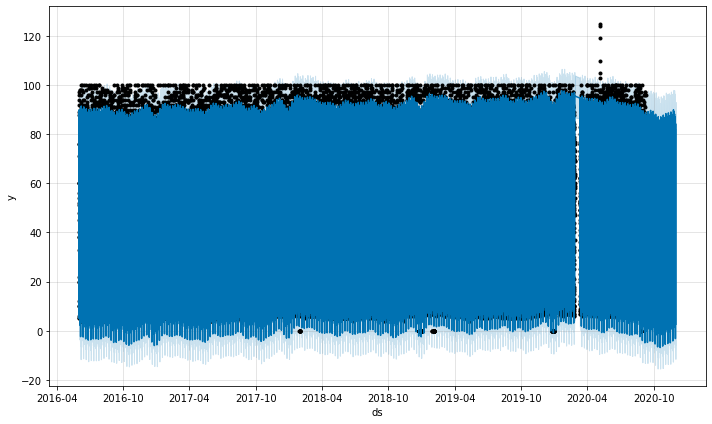

In [ ]:
import matplotlib.pyplot as plt

# Plot the Prophet predictions for the Mercado trends data
model_mercado_trends.plot(forecast_mercado_trends)
plt.show()

##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:** Based off of the forecast visual above, it is hard to tell, however, it seems that search activity slows down throughout the rest of 2020.


#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [ ]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast_mercado_trends = forecast_mercado_trends.set_index('ds')

# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
print(forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']])


                          yhat  yhat_lower  yhat_upper
ds                                                    
2016-06-01 00:00:00  89.564320   81.588771   98.022229
2016-06-01 01:00:00  86.011152   77.555920   94.812573
2016-06-01 02:00:00  75.688698   67.207839   84.551933
2016-06-01 03:00:00  60.422515   51.920457   69.011968
2016-06-01 04:00:00  43.308673   34.751287   51.770518
...                        ...         ...         ...
2020-11-30 04:00:00  39.545289   30.888799   47.907055
2020-11-30 05:00:00  24.074127   15.422134   32.991793
2020-11-30 06:00:00  12.108426    2.991255   21.078628
2020-11-30 07:00:00   4.836238   -3.434512   13.363743
2020-11-30 08:00:00   2.641312   -5.648442   10.978603

[39106 rows x 3 columns]


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

In [ ]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# From the forecast_mercado_trends DataFrame, use hvPlot to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours 
forecast_mercado_trends_last_2000_hours = forecast_mercado_trends.tail(2000)
forecast_mercado_trends_last_2000_hours.hvplot(y=['yhat', 'yhat_lower', 'yhat_upper'], shared_axes=False)


Output hidden; open in https://colab.research.google.com to view.

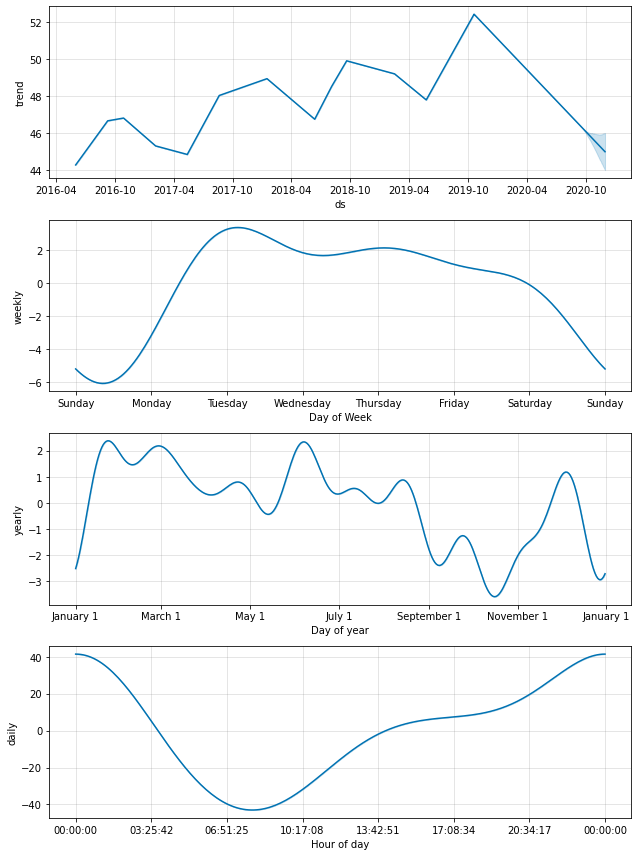

In [ ]:
# Reset the index in the forecast_mercado_trends DataFrame
forecast_mercado_trends = forecast_mercado_trends.reset_index()

# Use the plot_components function to visualize the forecast results 
# for the forecast_canada DataFrame 
figures_mercado_trends = model_mercado_trends.plot_components(forecast_mercado_trends)


##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:** Between 10pm-12AM is when there is the most activity.

**Question:** Which day of week gets the most search traffic? 
   
**Answer:** Tuesday appears to be the most popular day of the week.

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:** The first week of the year seems to have the lowest search traffic.


## Step 5 (Optional): Forecast Revenue by Using Time Series Models

A few weeks after your initial analysis, the finance group follows up to find out if you can help them solve a different problem. Your fame as a growth analyst in the company continues to grow!

Specifically, the finance group wants a forecast of the total sales for the next quarter. This will dramatically increase their ability to plan budgets and to help guide expectations for the company investors.

To do so, complete the following steps:

1. Read in the daily historical sales (that is, revenue) figures, and then apply a Prophet model to the data. The daily sales figures are quoted in millions of USD dollars.

2. Interpret the model output to identify any seasonal patterns in the company's revenue. For example, what are the peak revenue days? (Mondays? Fridays? Something else?)

3. Produce a sales forecast for the finance group. Give them a number for the expected total sales in the next quarter. Include the best- and worst-case scenarios to help them make better plans.




#### Step 1: Read in the daily historical sales (that is, revenue) figures, and then apply a Prophet model to the data.

In [ ]:
# Upload the "mercado_daily_revenue.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the DatetimeIndex
# Sales are quoted in millions of US dollars
from google.colab import files
uploaded = files.upload()

df_mercado_sales = pd.read_csv('mercado_daily_revenue.csv')
df_mercado_sales['date'] = pd.to_datetime(df_mercado_sales['date'])
df_mercado_sales = df_mercado_sales.set_index('date')

# Review the DataFrame
print(df_mercado_sales.head())


Saving mercado_daily_revenue.csv to mercado_daily_revenue (1).csv
            Daily Sales
date                   
2019-01-01     0.626452
2019-01-02     1.301069
2019-01-03     1.751689
2019-01-04     3.256294
2019-01-05     3.732920


In [ ]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Use hvPlot to visualize the daily sales figures 
df_mercado_sales.hvplot.line(
    x='date',
    y='Daily Sales',
    xlabel='Date',
    ylabel='Sales (USD)',
    title='Daily Sales'
)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Apply a Facebook Prophet model to the data.

# Set up the dataframe in the neccessary format:
# Reset the index so that date becomes a column in the DataFrame
mercado_sales_prophet_df = df_mercado_sales.reset_index()

# Adjust the columns names to the Prophet syntax
mercado_sales_prophet_df.columns = ["ds", "y"]

# Visualize the DataFrame
mercado_sales_prophet_df.head()


,ds,y
0,2019-01-01,0.626452
1,2019-01-02,1.301069
2,2019-01-03,1.751689
3,2019-01-04,3.256294
4,2019-01-05,3.732920


In [ ]:
# Create the model
mercado_sales_prophet_model = Prophet()

# Fit the model
mercado_sales_prophet_model.fit(mercado_sales_prophet_df)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplarqy9_h/xglkaa2q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplarqy9_h/07q2_yt_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77233', 'data', 'file=/tmp/tmplarqy9_h/xglkaa2q.json', 'init=/tmp/tmplarqy9_h/07q2_yt_.json', 'output', 'file=/tmp/tmplarqy9_h/prophet_modelmypnufye/prophet_model-20230316025737.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:57:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:57:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Predict sales for 90 days (1 quarter) out into the future.

# Start by making a future dataframe
mercado_sales_prophet_future = mercado_sales_prophet_model.make_future_dataframe(periods=90, freq='D')

# Display the last five rows of the future DataFrame
mercado_sales_prophet_future.tail()


,ds
585,2020-08-08
586,2020-08-09
587,2020-08-10
588,2020-08-11
589,2020-08-12


In [ ]:
# Make predictions for the sales each day over the next quarter
mercado_sales_prophet_forecast = mercado_sales_prophet_model.predict(mercado_sales_prophet_future)

# Display the first 5 rows of the resulting DataFrame
mercado_sales_prophet_forecast.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,0.132601,-1.709013,2.052803,0.132601,0.132601,0.063960,0.063960,0.063960,0.063960,0.063960,0.063960,0.0,0.0,0.0,0.196561
1,2019-01-02,0.171786,-1.631806,2.119914,0.171786,0.171786,0.083109,0.083109,0.083109,0.083109,0.083109,0.083109,0.0,0.0,0.0,0.254896
2,2019-01-03,0.210972,-1.744118,2.198722,0.210972,0.210972,0.019668,0.019668,0.019668,0.019668,0.019668,0.019668,0.0,0.0,0.0,0.230640
3,2019-01-04,0.250157,-1.661171,2.169034,0.250157,0.250157,-0.058251,-0.058251,-0.058251,-0.058251,-0.058251,-0.058251,0.0,0.0,0.0,0.191905
4,2019-01-05,0.289342,-1.823242,2.142867,0.289342,0.289342,-0.124438,-0.124438,-0.124438,-0.124438,-0.124438,-0.124438,0.0,0.0,0.0,0.164904


#### Step 2: Interpret the model output to identify any seasonal patterns in the company's revenue. For example, what are the peak revenue days? (Mondays? Fridays? Something else?)

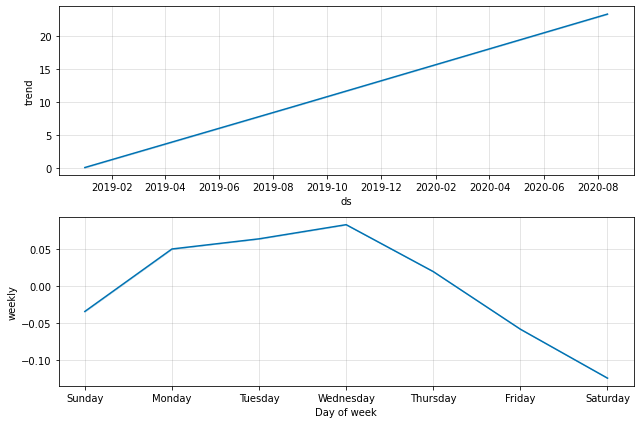

In [ ]:
# Use the plot_components function to analyze seasonal patterns in the company's revenue
mercado_sales_prophet_model.plot_components(mercado_sales_prophet_forecast);


##### Answer the following question:

**Question:** For example, what are the peak revenue days? (Mondays? Fridays? Something else?)

**Answer:** According to the visual above, it shows that Wednesdays are the peak revenue days.

#### Step 3: Produce a sales forecast for the finance group. Give them a number for the expected total sales in the next quarter. Include the best- and worst-case scenarios to help them make better plans.

In [ ]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Plot the predictions for the Mercado sales
mercado_sales_prophet_forecast.hvplot(y=['yhat', 'yhat_upper', 'yhat_lower'], line_color=['blue', 'green', 'red'])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# For the mercado_sales_prophet_forecast DataFrame, set the ds column as the DataFrame Index
mercado_sales_prophet_forecast = mercado_sales_prophet_forecast.set_index('ds')

# Display the first and last five rows of the DataFrame
print(mercado_sales_prophet_forecast.head())
print(mercado_sales_prophet_forecast.tail())


               trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
ds                                                                       
2019-01-01  0.132601   -1.709013    2.052803     0.132601     0.132601   
2019-01-02  0.171786   -1.631806    2.119914     0.171786     0.171786   
2019-01-03  0.210972   -1.744118    2.198722     0.210972     0.210972   
2019-01-04  0.250157   -1.661171    2.169034     0.250157     0.250157   
2019-01-05  0.289342   -1.823242    2.142867     0.289342     0.289342   

            additive_terms  additive_terms_lower  additive_terms_upper  \
ds                                                                       
2019-01-01        0.063960              0.063960              0.063960   
2019-01-02        0.083109              0.083109              0.083109   
2019-01-03        0.019668              0.019668              0.019668   
2019-01-04       -0.058251             -0.058251             -0.058251   
2019-01-05       -0.124438           

In [ ]:
# Produce a sales forecast for the finance division
# giving them a number for expected total sales next quarter.
# Provide best case (yhat_upper), worst case (yhat_lower), and most likely (yhat) scenarios.


# Create a forecast_quarter Dataframe for the period 2020-07-01 to 2020-09-30
# The DataFrame should include the columns yhat_upper, yhat_lower, and yhat
mercado_sales_forecast_quarter = mercado_sales_prophet_forecast.loc['2020-07-01':'2020-09-30', ['yhat_upper', 'yhat_lower', 'yhat']]

# Update the column names for the forecast_quarter DataFrame
# to match what the finance division is looking for 
mercado_sales_forecast_quarter = mercado_sales_forecast_quarter.rename(columns={'yhat_upper': 'best_case', 
                                                                                'yhat_lower': 'worst_case', 
                                                                                'yhat': 'most_likely'})

# Review the last five rows of the DataFrame
print(mercado_sales_forecast_quarter.tail())


            best_case  worst_case  most_likely
ds                                            
2020-08-08  24.944772   21.287635    23.096016
2020-08-09  25.089924   21.412444    23.225785
2020-08-10  25.268980   21.554418    23.349906
2020-08-11  25.279460   21.658233    23.403244
2020-08-12  25.418852   21.568270    23.462003


In [ ]:
# Displayed the summed values for all the rows in the forecast_quarter DataFrame
summed_values = mercado_sales_forecast_quarter.sum(axis=0)

# Display the summed values
print(summed_values)

best_case      1051.508774
worst_case      888.079271
most_likely     969.607769
dtype: float64


### Based on the forecast information generated above, produce a sales forecast for the finance division, giving them a number for expected total sales next quarter. Include best and worst case scenarios, to better help the finance team plan.

**Answer:** According to our overall data, it appears the expected total sales for next quarter will be at 969.60 while the best case scenario would have sales at 1051.50 and worst case scenario sales would be at 888.07.